# Data Analysis and Description

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
pd.options.mode.chained_assignment = None

In [118]:
data = '/Users/carolinalara/PycharmProjects/RetoEntrega0/Data/'

In [119]:
orders = pd.read_csv(data+'orders.csv')
aisle = pd.read_csv(data+'aisles.csv')
products = pd.read_csv(data+'products.csv')
order_train = pd.read_csv(data+'order_products__train.csv')
order_prior = pd.read_csv(data+'order_products__prior.csv')
departments = pd.read_csv(data+'departments.csv')


In [120]:
# Aisles

In [121]:
aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [122]:
aisle.tail()

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [124]:
num_aisle = aisle["aisle_id"].nunique()
print(f"Number of unique aisles: {num_aisle}")

Number of unique aisles: 134


In [127]:
aisle.aisle.unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

In [130]:
# Products

In [131]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [132]:
products.tail()

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [133]:
num_products = products["product_id"].nunique()
print(f"Number of unique products: {num_products}")

Number of unique products: 49688


In [140]:
temp_df = products.groupby("department_id")["product_id"].count().reset_index()
temp_df.columns = ["Department ID", "Number of Products"]

temp_df

,Department ID,Number of Products
0,1,4007
1,2,548
2,3,1516
3,4,1684
4,5,1054
5,6,1139
6,7,4365
7,8,972
8,9,1858
9,10,38


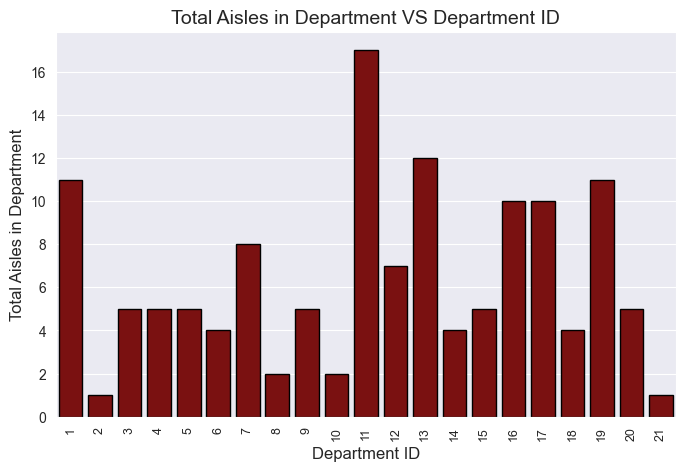

In [141]:
temp_df = products.groupby("department_id")["aisle_id"].nunique()

fig, ax = plt.subplots(figsize=(8, 5), facecolor="white")

sns.barplot(x=temp_df.index, y=temp_df.values, ax=ax, color="darkred", edgecolor="black")


ax.set_xlabel("Department ID", fontsize=12)
ax.set_ylabel("Total Aisles in Department", fontsize=12)
ax.set_title("Total Aisles in Department VS Department ID", fontsize=14)


ax.xaxis.set_tick_params(rotation=90, labelsize=9)


fig.savefig("Total Aisles in Department VS Department ID.png", facecolor="white")


plt.show()

In [143]:
# Departments

In [144]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [145]:
departments.tail()

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [146]:
num_departments = departments["department_id"].nunique()
print(f"Number of departments: {num_departments}")

Number of departments: 21


In [147]:

departments.department.unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

# Orders

In [70]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [71]:
orders.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [72]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [73]:
num_orders = orders["order_id"].nunique()
print(f"Number of unique orders: {num_orders}")

Number of unique orders: 3421083


In [74]:
num_orsers_user= orders["user_id"].nunique()
print(f"Number of unique users: {num_orsers_user}")

Number of unique users: 206209


In [75]:
orders.eval_set.value_counts()

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

In [76]:
print(f"Media de order number: {orders['order_number'].mean()}")
print(f"Mediana de order number: {orders['order_number'].median()}")

print(f"Media de día desde el último pedido: {orders['days_since_prior_order'].mean()}")
print(f"Mediana de día desde el último pedido: {orders['days_since_prior_order'].median()}")

print(f"Moda de día de la semana: {orders['order_dow'].mode().values}")
print(f"Moda de hora del día: {orders['order_hour_of_day'].mode().values}")


Media de order number: 17.154857979183785
Mediana de order number: 11.0
Media de día desde el último pedido: 11.114836226863012
Mediana de día desde el último pedido: 7.0
Moda de día de la semana: [0]
Moda de hora del día: [10]


In [77]:
total_orders_per_dow = orders["order_dow"].value_counts().sort_index()
print(total_orders_per_dow)

order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: count, dtype: int64


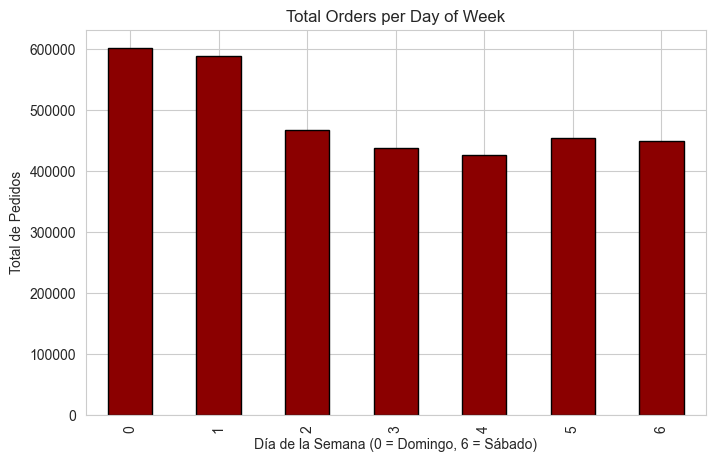

In [97]:

plt.figure(figsize=(8,5) , facecolor="white")
total_orders_per_dow.plot(kind="bar", color="darkred", edgecolor="black")

# Etiquetas y título
plt.xlabel("Día de la Semana (0 = Domingo, 6 = Sábado)")
plt.ylabel("Total de Pedidos")
plt.title("Total Orders per Day of Week")
plt.gca().set_facecolor("white") 
# Mostrar el gráfico
plt.show()

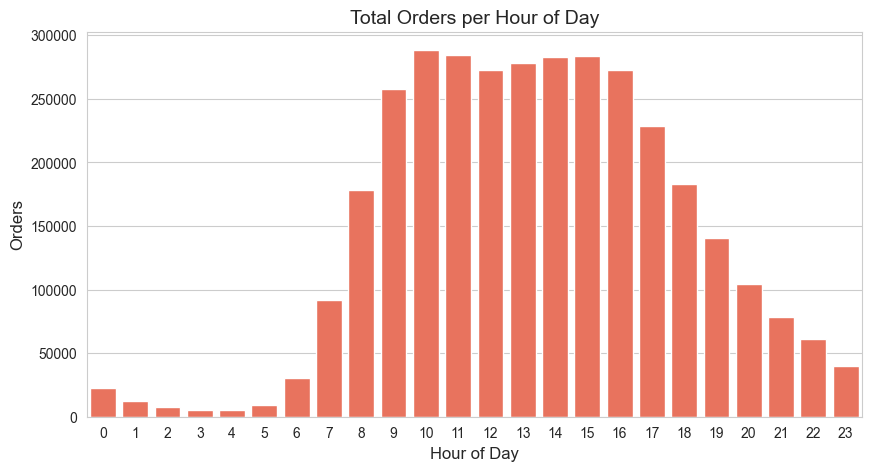

In [95]:

fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")

# Graficar los pedidos por hora del día
sns.countplot(x=orders["order_hour_of_day"], color="tomato", ax=ax)


ax.set_xlabel("Hour of Day", size=12)
ax.set_ylabel("Orders", size=12)
ax.set_title("Total Orders per Hour of Day", fontsize=14)


ax.tick_params(axis="both", labelsize=10)


ax.set_facecolor("white")


fig.savefig("Total Orders per Hour of Day.png", facecolor="white")


plt.show()

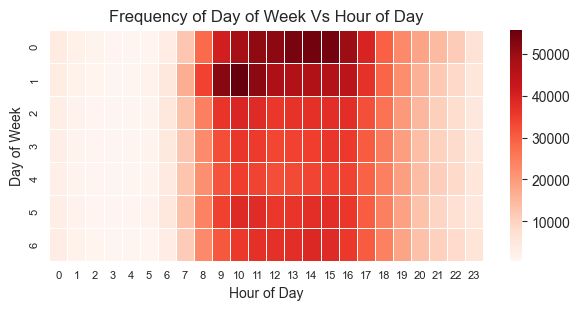

In [94]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"]).size().unstack()

fig, ax = plt.subplots(figsize=(7, 3), facecolor="white")  # Definir figura correctamente

# Graficar el heatmap
sns.heatmap(temp_df, cmap="Reds", linewidths=0.5, ax=ax)

# Configurar título y etiquetas
ax.set_title("Frequency of Day of Week Vs Hour of Day", size=12)
ax.set_xlabel("Hour of Day", size=10)
ax.set_ylabel("Day of Week", size=10)
ax.tick_params(axis="both", labelsize=8)

# Ajustar la barra de color
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

# Guardar la figura con fondo blanco
fig.savefig("Frequency of Day of Week Vs Hour of Day.png", facecolor="white")

# Mostrar el gráfico
plt.show()